# Define a problem or research question you will aim to address throughout the course

--> Something personally interesting to you

--> Tell us why it is interesting/important!

--> Something that you can perform analysis on and specifically, make a prediction about

--> The more focused, measurable, and specific you can be, the better

### Problem:
What factors are responsible for influencing taxi fares (particularly in DC)and can we build a model to predict taxi fares based on distance, time and duration of journey.



*   I am from India, and I have used various cab services like traidtional cabs, Uber, ola, etc. The fares that cab companies show are often unpredictable and unreasonable. Also, it changes with time of day, trip distance requested, traffic on the route, etc. Even, a study shows that, in India, fares are different for same trip on mobile phones with different operating systems. That is, on Iphones, app might ask for more money than on an android phone. Now, after moving to US, I am interested in studying the taxi systems here. Beyond my personal interest, the study might help customers with transparency and predictability as well as it might help companies in understanding revenue patterns.
*   I can perform an analysis to find out patterns such as taxi useage according to seasonality, maximum serviced area, high traffic areas and predict taxi fares using trip distance, milage, and time of the day. I can cluster population on customer with specific trats who tend to tip more.
*   It is generally said that airport trips cost more than ordinary ones. We can test out a hypothesis based on the same.

---



# Determine the population you wish to study

--> Describe this population.

*   The population I wish to study is taxi-cab data that provided service in the Washington DC area in year 2024.
*   The trip records differ by trip distance, time of day, mode of payment.
*   Each record contains fare details, tip amount, milage, pickup and drop off location details, timestamps.


---




# Identify variable(s) in the population sample that you will study

--> What are the independent variable(s)?

--> What is the dependent variable? (Ideally you have a single DI.)

--> Confounding variable

--> Explain what a confounding variable is.

--> Identify any potential confounding variables in your study.

--> How will you deal with them?

--> Or, if not something that can be dealt with here, why not and how
might you address it if you had the resources to do so?

**Independent variables:** Milage, Duration, Airport (categorical- whether the trip is for airport or not), Payment Type, Trip Type, Origin and Destination Blockname, Provider Name (Cab Company)

**Dependent Variables:** Total Fare Amount

--> Confounding variable is and external factor that may affect the relationships between dependent and independent variables.

**Confounding Variables:**
*   Day of Week: trips on weekdays can be costlier than weekends or trips to vacation spots can be costlier on weekends or holidays.
*   Month of trip: seasonality affects trip fares.
*   Hour of the day: peak hours like office opening-closing timings might have higher fares.
*   Traffic/ congestion along route : traffic may increase trip time and may increase fare amount.
*   Weather conditions : bad weather conditions can increase time required to reach destination and may increase surcharge.
*   Diversions : Construction work or accidents on road may cause diversions which in turn increases trip duration.
*   Tolls : Toll booths can be time consuming and it increases the total fare because of toll fare.

We can create those variables using existing data in the dataset. Make new features such as day of week, month of trip and hour of the day.
Build seperate models over peak and non-peak hours categories.
We do not have any available data regarding weather, traffic condition and hence we can add those resources later when we have data available. If we had data resources of weather conditions and traffic conditions, we would have categorised population accordingly and build model to check for differences and analyse patterns.



---





# Formulate a hypothesis

--> What do you suspect analysis of the data will find?

--> Use the format shown in lecture.

If trip source or destination involves airport (pickup or drop-off), then the fare amount will be higher than for non-airport trips.


---



# Develop a detailed plan for data collection

--> How will you get the data?

--> How will you ensure representativeness when using a sample?

--> What method will you use to collect the data?

*   The data is publically available on DC Gov website which I can download and and upload it to google drive.
*   In colab, access the data on google drive and perform further analysis on it.
*   The data is available in csv format and it has 12 files for 12 months which I will merge in one file (as master dataset).
*   I can use stratified sampling with month and hour to make sure I have evenly distributed data with minimal bias. Draw a random sample size that preserves proportion across strata.
*   Data is well represented across 12 months of year, various categories such as mode of payment, source and destination locations, etc.


---



# Choose a data set

--> Explain why this dataset is interesting to you

--> What is in the dataset?

--> Where is the dataset from?
    
    --> Include the link for where you obtained the dataset from, or if you
    created it yourself please give details of how you generated it.

--> When is the dataset from?

The data has various features that can help us predict prices, perofrm analysis and find patterns which will be useful for customers, drivers as well as cab companies. In my opinion, this is an excellent example of data science. That is why the dataset interests me.

The dataset is records of taxi trips across Washington DC in year 2024.
It has 12 csv files with records of each month and a text file with dataset info. Each file has about 200k records and in total there are more than 2.5 million records.

The dataset is publically available at DC Gov website: https://dcgov.app.box.com/v/TaxiTrips2024



Dataset has following features:
1.   TRIPTYPE
2.   PROVIDERMANE
3.   TOTALFARE
4.   GRATUITYAMOUNT
5.   SURCHARGEAMOUNT
6.   EXTRAFAREAMOUNT
7.   TOLLAMOUNT
8.   TOTALAMOUNT
9.   PAYMENTTYPE
10.  MILAGE
11.  DURATION
12.  ORIGIN
13.  DESTINATION
14.  AIRPORT
15.  ORIGINTIME
16.  DESTINATIONTIME


Categories explained:

Payment Type

1.	Credit

2.	Cash

3.	EHail

4.	Other (not sure how common this is)

5.	Uber (not sure how common this is)

Trip Type

1.	Ordinal (normal rate)

2.	VoD

3.	TransportDC (grant program)

4.	TransportDCShared (grant program)

5.	MOVA (grant program)

6.	CFSA (grant program)

7.	NRS (grant program)

8.	NEMT (grant program




---









# Import the data in Colab

In [ ]:
# I will import the data on google drive.
import os
import glob
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/OpenDataDC_Taxi_2024/'
files = glob.glob(os.path.join(folder_path, '*.csv'))
print(f"Found {len(files)} files.")

Found 12 files.


In [ ]:
# now I will merge those file to make a master dataset
df_list = []
for individual_file in files:
    '''Extract month from filename.
    File naming convention is: taxi_2024_01.csv'''
    month = os.path.basename(individual_file).split("_")[-1].split(".")[0]
    temp_df = pd.read_csv(individual_file)
    temp_df["MONTH"] = month
    df_list.append(temp_df)

In [ ]:
#concat the dataframe
masterDF = pd.concat(df_list, ignore_index=True)

In [ ]:
#save the file in same directory
output = os.path.join(folder_path, "master_data.csv")
masterDF.to_csv(output, index=False)

In [ ]:
#Quick check
print(f"Master dataset created with shape: {masterDF.shape}")
print(f"Saved to: {output}")

Master dataset created with shape: (2670564, 28)
Saved to: /content/drive/MyDrive/OpenDataDC_Taxi_2024/master_data.csv


In [ ]:
#Note: all the code blocks above are one time run, because the master file will be created only once and used furtheras per the need.

# Print the first 5 data entries from the file

In [ ]:
#heretoforth run code cells below

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

/tmp/ipython-input-954098458.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
print("First five entries:")
df.head()

First five entries:


,OBJECTID,TRIPTYPE,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,ORIGINCITY,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LAT,DESTINATION_BLOCK_LONG,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,MONTH,COMPOSITE_ID
0,1,NaN,5.68,0.00,0.25,0.00,NaN,5.93,2,Washington,...,-77.003107,100 BLOCK GALLOWAY STREET NE,38.953713,-76.988006,5100 BLOCK SARGENT ROAD NE,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_1
1,3,NaN,44.13,0.00,0.25,2.25,0.0,46.38,4,WASHINGTON,...,-77.034531,2000 BLOCK 15TH STREET NW,NaN,NaN,NaN,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_3
2,4,NaN,14.32,0.00,0.25,0.00,NaN,14.57,2,Washington,...,-77.026514,1000 BLOCK H STREET NW,38.940920,-77.021225,600 BLOCK TAYLOR STREET NW,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_4
3,5,NaN,14.05,2.57,0.25,0.00,0.0,16.87,1,Washington,...,-77.006479,UNIT BLOCK COLUMBUS CIRCLE NE,38.909637,-77.047716,2100 BLOCK P STREET NW,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_5
4,6,NaN,29.44,0.00,0.25,0.00,NaN,29.69,2,Arlington,...,NaN,NaN,38.960025,-77.082892,5300 BLOCK 42ND PLACE NW,Y,01/01/2024 00:00,01/01/2024 00:00,1,1_6


In [ ]:
print('Shape of data', df.shape)

Shape of data (2607170, 28)




---


# **Project 2:**

Get some preliminary information about the dataset

○ What is the shape of the data?

○ What data types are in the data?

○ List all the columns/variables in the data

○ How many unique elements are in the data?

○ Any descriptive statistics on the overall data?

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

In [ ]:
print("Shape:", df.shape)

Shape: (2607170, 28)


In [ ]:
print("Datatypes:", df.dtypes)

Datatypes: OBJECTID                    int64
TRIPTYPE                   object
FAREAMOUNT                float64
GRATUITYAMOUNT            float64
SURCHARGEAMOUNT           float64
EXTRAFAREAMOUNT           float64
TOLLAMOUNT                float64
TOTALAMOUNT               float64
PAYMENTTYPE                 int64
ORIGINCITY                 object
ORIGINSTATE                object
ORIGINZIP                  object
DESTINATIONCITY            object
DESTINATIONSTATE           object
DESTINATIONZIP             object
MILEAGE                   float64
DURATION                    int64
ORIGIN_BLOCK_LATITUDE     float64
ORIGIN_BLOCK_LONGITUDE    float64
ORIGIN_BLOCKNAME           object
DESTINATION_BLOCK_LAT     float64
DESTINATION_BLOCK_LONG    float64
DESTINATION_BLOCKNAME      object
AIRPORT                     int64
ORIGINDATETIME_TR          object
DESTINATIONDATETIME_TR     object
MONTH                       int64
COMPOSITE_ID               object
dtype: object


In [ ]:
print("Features:\n", df.columns)

Features:
 Index(['OBJECTID', 'TRIPTYPE', 'FAREAMOUNT', 'GRATUITYAMOUNT',
       'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT', 'TOLLAMOUNT', 'TOTALAMOUNT',
       'PAYMENTTYPE', 'ORIGINCITY', 'ORIGINSTATE', 'ORIGINZIP',
       'DESTINATIONCITY', 'DESTINATIONSTATE', 'DESTINATIONZIP', 'MILEAGE',
       'DURATION', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE',
       'ORIGIN_BLOCKNAME', 'DESTINATION_BLOCK_LAT', 'DESTINATION_BLOCK_LONG',
       'DESTINATION_BLOCKNAME', 'AIRPORT', 'ORIGINDATETIME_TR',
       'DESTINATIONDATETIME_TR', 'MONTH', 'COMPOSITE_ID'],
      dtype='object')


In [ ]:
print("Number of unique values:\n" , df.nunique())
#no. of unique object id's show us the unique entries in the dataset

'''I ran this file after preprocessing - by mistake. Before- object if has very less(3 digit) unique values'''

Number of unique values:
 OBJECTID                   266500
TRIPTYPE                        4
FAREAMOUNT                  12073
GRATUITYAMOUNT               2925
SURCHARGEAMOUNT                 6
EXTRAFAREAMOUNT               516
TOLLAMOUNT                    202
TOTALAMOUNT                 13693
PAYMENTTYPE                     5
ORIGINCITY                    634
ORIGINSTATE                    23
ORIGINZIP                     490
DESTINATIONCITY              1728
DESTINATIONSTATE               30
DESTINATIONZIP                762
MILEAGE                      7208
DURATION                     9480
ORIGIN_BLOCK_LATITUDE        8659
ORIGIN_BLOCK_LONGITUDE       8662
ORIGIN_BLOCKNAME             8203
DESTINATION_BLOCK_LAT        9729
DESTINATION_BLOCK_LONG       9736
DESTINATION_BLOCKNAME        8930
AIRPORT                         2
ORIGINDATETIME_TR            8784
DESTINATIONDATETIME_TR       8789
MONTH                          12
COMPOSITE_ID              2607170
dtype: int64


As we can see, there are 266,635 unique entries with 27 features in the dataset, there are 3 types of triptypes and 5 types of mode of payment. Fare and charge amounts, location data are in float format; whereas string format data like providername, source and destination are coded in object datatype.

In [ ]:
df['TRIPTYPE'].unique()

array(['Unknown', 'Ordinal', 'Transport DC', 'Other grant program'],
      dtype=object)

In [ ]:
print("Mean of fare amounts: ",df['FAREAMOUNT'].mean())

Mean of fare amounts:  17.456797435533556


In [ ]:
# this cell is executed once and should not be executed again
print("Unique values in providername:",df['PROVIDERNAME'].unique().sum())
NullPercentageinProvidername = (df['PROVIDERNAME'].isnull().sum()/len(df))*100
print("\n Percentage of Null values in ProviderName:",NullPercentageinProvidername)

As we can see all the values in ProviderName are null, we can just drop the column.

In [ ]:
'''this cell has been executed once and the column ProviderName does not exist in master data anymore
  so do not run this cell'''
df.drop(columns=['PROVIDERNAME'], inplace=True)



---



Look for specific data needs for your project

○ ex. Do you have multiple datasets that need to be merged?

○ What are they?

○ How are you addressing them?

○ If there are no specific needs for your project, state/explain that.

**Answer:**

I had multiple csv files for each month of year 2024, which I already merged in project 1 to get info about whole dataset. I uploaded all the files on google drive, mounted the google drive, added folder path and merged all the files. There was not a single conflict, beacuse the dataset structure (feature sequence) is same in all the files.


---



Look for potential issues in the data

○ Are there duplicates? How many? Anything useful around unique values?

○ Any missing or null values? What type of missing data? Where are they? Are they expected?

○ Any type inconsistency? ○ Any problematic misspellings/mistypings? ○ Any weird outliers?

    ■ Show how you are detecting them! (ex. using Z-Score)

○ What else? ○ If there are no issues found:

    ■ Explain why in detail and show how you determined that.
  
    ■ If it is a perfectly clean dataset, inject a couple of fake issues (ex. an outlier, a duplicate, etc) and show how you would address it.


Develop a detailed plan for how you will clean your data


○ Based on the potential issues you found, how will you address them?


○ What techniques will you use and why?



In [ ]:
UniqueOBJECTIDPercentage = (df['OBJECTID'].nunique()/df['OBJECTID'].count()*100)
print("Percentage of duplicate rows:", UniqueOBJECTIDPercentage)

Percentage of duplicate rows: 10.221811389360878


We are able to see only 9.98% of unique object IDs in out data. Does this mean 90% of data is duplicate? No. We have merged 12 files representing each month which has own OBJECTID starting from 1.

We need to create a new column and make new ID based on month and repective object ID so that we can work on the new ID (which will work as primary key for our dataset)

In [ ]:
#before status
df.shape

(2607170, 28)

In [ ]:
''' this cell is executed once and should not be executed again
  the composite id column has been already written in master data'''
df['COMPOSITE_ID'] = df['MONTH'].astype(str) + "_" + df['OBJECTID'].astype(str)
df.to_csv(file_path, index=False)

In [ ]:
df.tail()

,OBJECTID,TRIPTYPE,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,ORIGINCITY,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LAT,DESTINATION_BLOCK_LONG,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,MONTH,COMPOSITE_ID
2607165,195149,Ordinal,22.19,0.0,0.50,0.0,NaN,23.69,2,Washington,...,-77.007533,600 BLOCK 1ST STREET NE,38.930286,-77.081183,4000 BLOCK CATHEDRAL AVENUE NW,0,12/31/2024 23:00,01/01/2025 00:00,12,12_195149
2607166,195150,Ordinal,91.79,0.0,0.50,0.0,NaN,96.29,2,Arlington,...,NaN,NaN,NaN,NaN,NaN,1,12/31/2024 23:00,01/01/2025 00:00,12,12_195150
2607167,195151,Ordinal,26.16,0.0,0.50,0.0,NaN,26.66,2,Washington,...,-77.006479,UNIT BLOCK COLUMBUS CIRCLE NE,38.890064,-77.023971,UNIT BLOCK 9TH STREET NW,0,12/31/2024 23:00,01/01/2025 00:00,12,12_195151
2607168,195153,Ordinal,84.32,0.0,0.50,0.0,0.0,84.82,2,Sterling,...,NaN,NaN,38.883883,-77.024569,400 BLOCK L'ENFANT PLAZA SW,1,12/31/2024 23:00,01/01/2025 13:00,12,12_195153
2607169,195154,Ordinal,9.67,0.0,0.25,0.5,0.0,10.17,2,WASHINGTON,...,-77.054955,2500 BLOCK VIRGINIA AVENUE NW,38.900773,-77.036550,800 BLOCK 16TH STREET NW,0,12/31/2024 23:00,01/01/2025 14:00,12,12_195154


In [ ]:
#after additon of column status
df.shape

(2607170, 28)

In [ ]:
UniqueOBJECTIDPercentage = (df['COMPOSITE_ID'].nunique()/df['COMPOSITE_ID'].count()*100)
print("Percentage of duplicate rows:", UniqueOBJECTIDPercentage)

Percentage of duplicate rows: 100.0


As we can see now, we have 100% unique data without any duplicates

In [ ]:
#we will check similar percentages across all features
print('Percentage of Null values in feature:\n')
NullPercentage = 0
for i in range (1,27):
  NullPercentage = (df[df.columns[i]].isnull().sum() / len(df)) * 100
  print(f"{df.columns[i]}: {NullPercentage:.2f}%")

Percentage of Null values in feature:

TRIPTYPE: 0.00%
FAREAMOUNT: 0.00%
GRATUITYAMOUNT: 0.00%
SURCHARGEAMOUNT: 0.00%
EXTRAFAREAMOUNT: 0.00%
TOLLAMOUNT: 43.44%
TOTALAMOUNT: 0.00%
PAYMENTTYPE: 0.00%
ORIGINCITY: 0.00%
ORIGINSTATE: 0.00%
ORIGINZIP: 0.00%
DESTINATIONCITY: 0.00%
DESTINATIONSTATE: 0.00%
DESTINATIONZIP: 0.00%
MILEAGE: 0.00%
DURATION: 0.00%
ORIGIN_BLOCK_LATITUDE: 17.29%
ORIGIN_BLOCK_LONGITUDE: 17.29%
ORIGIN_BLOCKNAME: 17.29%
DESTINATION_BLOCK_LAT: 21.87%
DESTINATION_BLOCK_LONG: 21.87%
DESTINATION_BLOCKNAME: 21.87%
AIRPORT: 0.00%
ORIGINDATETIME_TR: 0.00%
DESTINATIONDATETIME_TR: 0.00%
MONTH: 0.00%


At time of running cell for first time:

--> TripType column has 6.67% of null values. We need to get more info about this column to work on this

--> FareAmount, GratuityAmount, SurchargeAmount, ExtraFareAmount all these columns show same percentage of null values, which can be common. Fare amount can/ should not be null/nil. So, we would drop those rows with null values of these fares (we can drop it as percentage is small).

--> TollAmount has large number of null values i.e. 44.78% which is reasonable, because each trip might not consist of routes with tolls, so the toll amount is null and we can move ahead with that.

--> Also, we have 0 null values in features such as TotalAmount, PaymentType, OriginCity, OriginZip, DestinationCIty, DestinationZip, Milage, Duration, OriginTime, DestinationTime and Month which depicts that we have complete data in those features.

--> OriginState and DestinationState have small number (0.46%) of null values. We can fill those values with mode imputation. KNN imputer can work better, but we will see if we really need it in future and we can iterate back to this step and use KNN imputer.

--> The Airport Feature tells us whether the trip is from/to the airport and the null values in the column depict that it is not a airport trip. We should modify the column in binary encoding like 1 for yes and 0 for no.

--> These are the most important preprocessing tasks required for now. Note that we have large amount of null values in Source Location and Destination Location along with BlockNames which I will probably not going to use. Still, we can do the required processing as per the need,

In [ ]:
'''this cell has been executed once, and should not be executed again. the null values in FAREAMOUNT have been dropped out of master data'''

# dropping rows with null values in FAREAMOUNT
df = df.dropna(subset=['FAREAMOUNT'])
df = df.dropna(subset=['TOTALAMOUNT'])
df.to_csv(file_path, index=False)

print("New shape:", df.shape)

New shape: (2607168, 28)


In [ ]:
NullPercentage = (df[df.columns[2]].isnull().sum() / len(df)) * 100
print('Percentage of Null values in feature:')
print(f"{df.columns[2]}: {NullPercentage:.2f}%")

Percentage of Null values in feature:
FAREAMOUNT: 0.00%


Now we have all important and relevant rows about the FARES

In [ ]:
df['AIRPORT'].unique()

array([0, 1])

At time of running cell for first time:

As mentioned in the previous text cell, this is an inconsistency. Airport feature has values 'Y' and nan. We have to encode Y (yes) to 1 and null/no to 0

In [ ]:
'''this cell has been executed already and should not be executed again as the encoding in airport column is saved in master data'''

# Replace 'Y' with 1, and NaN with 0
df['AIRPORT'] = df['AIRPORT'].apply(lambda x: 1 if x == 'Y' else 0)

print(df['AIRPORT'].value_counts(dropna=False))

AIRPORT
0    2027102
1     580068
Name: count, dtype: int64


In [ ]:
df['AIRPORT'].unique()

array([0, 1])

Mode inputation to fill null values in ORIGINSTATE and DESTINATIONSTATE: simple to use, represents data well, maintain data consistency

In [ ]:
df['ORIGINSTATE'].fillna(df['ORIGINSTATE'].mode()[0], inplace=True)
df['DESTINATIONSTATE'].fillna(df['DESTINATIONSTATE'].mode()[0], inplace=True)

/tmp/ipython-input-4285036933.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ORIGINSTATE'].fillna(df['ORIGINSTATE'].mode()[0], inplace=True)
/tmp/ipython-input-4285036933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

In [ ]:
df['TRIPTYPE'].unique()

array(['Unknown', 'Ordinal', 'Transport DC', 'Other grant program'],
      dtype=object)

In [ ]:
df['TRIPTYPE'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3128092199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TRIPTYPE'].fillna('Unknown', inplace=True)


In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

In [ ]:
#we will check null value percentages across all features
print('Percentage of Null values in feature:\n')
NullPercentage = 0
for i in range (1,27):
  NullPercentage = (df[df.columns[i]].isnull().sum() / len(df)) * 100
  print(f"{df.columns[i]}: {NullPercentage:.2f}%")

Percentage of Null values in feature:

TRIPTYPE: 0.00%
FAREAMOUNT: 0.00%
GRATUITYAMOUNT: 0.00%
SURCHARGEAMOUNT: 0.00%
EXTRAFAREAMOUNT: 0.00%
TOLLAMOUNT: 43.44%
TOTALAMOUNT: 0.00%
PAYMENTTYPE: 0.00%
ORIGINCITY: 0.00%
ORIGINSTATE: 0.00%
ORIGINZIP: 0.00%
DESTINATIONCITY: 0.00%
DESTINATIONSTATE: 0.00%
DESTINATIONZIP: 0.00%
MILEAGE: 0.00%
DURATION: 0.00%
ORIGIN_BLOCK_LATITUDE: 17.29%
ORIGIN_BLOCK_LONGITUDE: 17.29%
ORIGIN_BLOCKNAME: 17.29%
DESTINATION_BLOCK_LAT: 21.87%
DESTINATION_BLOCK_LONG: 21.87%
DESTINATION_BLOCKNAME: 21.87%
AIRPORT: 0.00%
ORIGINDATETIME_TR: 0.00%
DESTINATIONDATETIME_TR: 0.00%
MONTH: 0.00%


Data is well handled so that it does not consist of any spelling mistakes.

In [ ]:
def calculate_z_score(column_name):
  '''function to calculate z-score:
     z=(x-mu)/sigma  '''
  return ((df[column_name]-df[column_name].mean())/df[column_name].std())

In [ ]:
outlier_target_columns = ['FAREAMOUNT', 'TOTALAMOUNT', 'GRATUITYAMOUNT', 'EXTRAFAREAMOUNT']

In [ ]:
for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    percentage_outliers = (outliers_count / len(df)) * 100
    print(column, ':', outliers_count, 'outliers')
    print(f"{percentage_outliers:.2f}% of total\n")
    print('\n')

FAREAMOUNT : 50127 outliers
1.92% of total



TOTALAMOUNT : 48152 outliers
1.85% of total



GRATUITYAMOUNT : 8941 outliers
0.34% of total



EXTRAFAREAMOUNT : 16446 outliers
0.63% of total





According to empirical rule, there should be 0.3 percent outliers outside (away from mean) the 3 standard deviations. But, there 1.85% of TOTALAMOUNT and 1.92% of FAREAMOUNT values outside 3 standard deviations. We have to look if the data explain the outliers.

For GRATUITYAMOUNT, simply remove outlier rows.

In [ ]:
outlier_target_columns = ['FAREAMOUNT', 'TOTALAMOUNT', 'EXTRAFAREAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    percentage_outliers = (outliers_count / len(df)) * 100
    print(column, ':', outliers_count, 'outliers')
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    display(outliers[display_columns].sort_values(by=column, ascending=False).tail(5))
    print('\n\n')

FAREAMOUNT : 50127 outliers


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
586033,214838,9304.4,0.0,0.25,0.0,NaN,9307.73
1174773,39662,4051.6,0.0,0.25,0.0,0.0,4051.88
1035495,157874,2870.3,0.0,0.25,1.0,0.0,2871.63
2226973,834,2285.2,0.0,0.50,0.0,NaN,2288.78
716169,96838,2268.8,0.0,0.25,0.0,0.0,2269.07


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
2031750,45023,63.43,0.0,0.25,2.50,0.0,65.93
2283363,58499,63.43,0.0,0.25,6.00,0.0,63.43
647875,26741,63.43,0.0,0.25,0.00,0.0,57.66
1856004,101940,63.43,0.0,0.50,0.00,NaN,64.93
103635,107135,63.43,0.0,0.25,3.25,0.0,63.43





TOTALAMOUNT : 48152 outliers


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
586033,214838,9304.40,0.0,0.25,0.0,NaN,9307.73
1174773,39662,4051.60,0.0,0.25,0.0,0.0,4051.88
771020,153090,15.94,2900.0,0.25,0.0,NaN,2916.19
1035495,157874,2870.30,0.0,0.25,1.0,0.0,2871.63
2414674,192719,4.00,2600.0,0.50,0.0,NaN,2604.50


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
2506356,92410,57.39,10.96,0.50,0.0,NaN,71.85
2277375,52343,71.85,0.00,0.25,0.5,0.0,71.85
2019212,32165,68.35,0.00,0.50,0.0,NaN,71.85
1752124,187882,71.35,0.00,0.25,0.5,0.0,71.85
2471366,56731,70.35,0.00,0.50,0.0,NaN,71.85





EXTRAFAREAMOUNT : 16446 outliers


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
2443391,27896,68.05,0.0,0.25,975.00,NaN,1043.30
463659,89245,36.73,0.0,0.25,625.00,NaN,661.98
1364349,233346,3.52,0.0,0.25,196.00,NaN,199.77
1560912,196104,107.28,0.0,0.25,103.25,0.0,107.28
2156358,172205,131.51,0.0,0.25,101.50,0.0,233.01


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
1293564,161130,12.34,0.0,0.25,6.25,0.0,18.59
1292744,160300,7.87,0.0,0.25,6.25,0.0,14.12
1299224,166919,27.36,0.0,0.25,6.25,0.0,27.36
179970,8018,3.25,3.0,0.25,6.21,0.0,12.71
1625077,58410,40.06,15.0,0.50,6.15,NaN,62.71


As reflected in above tables- (data is arranged in descending order)
first table shows head (first 5 rows) and second table shows (last 5 rows)

FAREAMOUNT-

--> head values are clearly outliers

--> tail vales explain itself as there can be rides with those fare amounts.

TOTALFARE-

--> head values are clearly outliers, there should not be total far of more than 3 digits for cab in D.C.

--> tail values explain itself.

EXTRAFAREAMOUNT-

--> head values are clearly outliers, no extra charge explain such high values.

--> tail values are explainatory


Plan:

--> check percentile to values for those columns and set threshold for abnormal values

In [ ]:
df['FAREAMOUNT'].quantile([0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 0.9995])

,FAREAMOUNT
0.5000,14.30000
0.7500,20.27000
0.9000,29.92000
0.9500,40.00000
0.9900,74.48000
0.9990,109.63833
0.9995,127.47499


In [ ]:
upper_limit = 127
before_rows = df.shape[0]
df = df[df['FAREAMOUNT'] <= upper_limit]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2607168
Rows After:  2605835


In [ ]:
outlier_target_columns = ['FAREAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
224536,53851,126.91,0.00,0.25,0.0,NaN,127.16
1294684,162263,126.91,26.03,0.25,0.0,NaN,156.19
614464,244072,126.91,19.84,0.25,3.0,0.0,150.00
854132,238315,126.91,19.07,0.25,0.0,0.0,146.23
785961,168467,126.91,25.63,0.25,1.0,0.0,153.79


In [ ]:
df['TOTALAMOUNT'].quantile([0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 0.9995, 0.9997, 0.9999])

,TOTALAMOUNT
0.5000,16.970000
0.7500,24.590000
0.9000,34.230000
0.9500,45.260000
0.9900,82.340000
0.9990,113.410000
0.9995,121.861660
0.9997,128.204996
0.9999,148.476664


In [ ]:
upper_limit = 128.20
before_rows = df.shape[0]
df = df[df['TOTALAMOUNT'] <= upper_limit]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2605835
Rows After:  2605053


In [ ]:
outlier_target_columns = ['TOTALAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
179527,7550,73.45,50.00,0.25,4.50,0.0,128.20
1907038,154295,123.68,4.00,0.25,0.25,0.0,128.18
2307492,83071,103.30,21.36,0.50,0.00,NaN,128.16
2532893,119604,94.11,19.55,0.50,10.00,NaN,128.16
1652010,85790,126.65,0.00,0.50,0.00,NaN,128.15


In [ ]:
df['EXTRAFAREAMOUNT'].quantile([0.50, 0.75, 0.90, 0.95, 0.99, 0.995, 0.999])

,EXTRAFAREAMOUNT
0.500,0.00
0.750,2.25
0.900,3.00
0.950,3.25
0.990,5.00
0.995,6.75
0.999,13.50


In [ ]:
upper_limit = 6.75
before_rows = df.shape[0]
df = df[df['EXTRAFAREAMOUNT'] <= upper_limit]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2605053
Rows After:  2592329


In [ ]:
outlier_target_columns = ['EXTRAFAREAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
237516,67313,19.96,0.00,0.25,6.75,0.0,19.96
242990,72893,12.70,0.00,0.25,6.75,0.0,19.70
241081,70930,19.16,0.00,0.25,6.75,0.0,19.16
240529,70369,21.61,4.29,0.25,6.75,0.0,32.90
628322,6735,11.91,0.00,0.25,6.75,0.0,11.91


In [ ]:
z_scores = (df['GRATUITYAMOUNT'] - df['GRATUITYAMOUNT'].mean()) / df['GRATUITYAMOUNT'].std()

before_rows = df.shape[0]
df = df[np.abs(z_scores) <= 3]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2592329
Rows After:  2540217


Done with careful outlier removal. Now the rest data seems explainatory and does not show any abnormal behavior.

In [ ]:
df.shape

(2540217, 28)

In [ ]:
df.to_csv(file_path, index=False)

#do not re-run this cell

Any reorganization needed?

○ ex. Any columns that would be better understood if renamed (i.e. column “a”
renamed to “age”, “height” renamed to “height in meters”)

**Answer:**

No reorganization needed. Features are well represented in dataset.

# **Project 3:**

Capture initial thoughts

○ Do you think you have the right data? Why or why not?

○ What are your initial questions before knowing much about the data?

I think I have the right data. The dataset I am using is the Taxi trips data from year 2024 in Washington D.C. Nevertheless, it has large amounts of entries (around 2.5 million rows), which is very good for capturing patterns, trends and prediction tasks. It has features such as fare amount, tip amount, trip duration, payment type, origin-destination details, etc. These features are important for the understanding of taxi fare behaviors. The data captured over a year can be very useful in detecting seasonality, peak hours and demand patterns. The data I have after data cleaning is both qualitative and quantitative.

I had read an interesting about taxi fare dynamics and patterns in India. When I landed here (in Washington D.C.), I saw skyrocketed taxi fares. It interested me and I thought that this would be an interesting thing to study.

Before seeing the data, I was curious, are all kinds of taxi fares expensive or is there a wide range of prices? What factors influence the fare amount? Are there any patterns like expensive rides during peak hours, holidays? Do airport rides cost different than normal ones? Does tipping behavior depend on somehting?

---

Explore characteristics of the data

○ What is the shape of your data?

○ What does each record/row in the dataset represent?

○ What variables/columns do you have?

○ Are there any duplicates?
  
    ■ How do you know?
  
    ■ For any duplicates not already addressed in Pre-Processing:

      ● How will you handle them? Handle them

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

In [ ]:
print("Shape of Data:", df.shape)

Shape of Data: (2540217, 28)


It means that it has 2,540,217 rows and 28 columns

Each row in the dataset represents a taxi ride having details of that ride.

In [ ]:
column_list = df.columns.tolist()
print(column_list)

['OBJECTID', 'TRIPTYPE', 'FAREAMOUNT', 'GRATUITYAMOUNT', 'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT', 'TOLLAMOUNT', 'TOTALAMOUNT', 'PAYMENTTYPE', 'ORIGINCITY', 'ORIGINSTATE', 'ORIGINZIP', 'DESTINATIONCITY', 'DESTINATIONSTATE', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGIN_BLOCKNAME', 'DESTINATION_BLOCK_LAT', 'DESTINATION_BLOCK_LONG', 'DESTINATION_BLOCKNAME', 'AIRPORT', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'MONTH', 'COMPOSITE_ID']


The executed cell above shows all the columns present in the dataset.

In data pre-processing, I observed that dataset had very less unique values in object ID column (primary key)-  around 200k; but total rows were 2.6 million. But, then I figured out that Object ID had values starting from 1 in csv file of each month which I merged at start. We created a new column 'Composite ID' using convention 'Month'+'Object ID' and checked if Composite ID had any duplicates. There were none, making Composite ID the new Primary Key. Still, I will check once to make sure that we do not have any duplicates.

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicated rows:", duplicate_rows.shape[0])

Number of duplicated rows: 0


---

Any additional transformations/manipulations you think you might need?

○ ex. mapping categoricals to numbers, different units, different date format,
string formatting, logarithmic transformation, etc

In pre-processing, I already encoded Airport feature in binary format (1 for yes and 0 for no).

Converted amounts from varchar to float

Converted Payment Type from varchar to integer

Date format is fine, no change needed

===========================================================================================================

Explore every variable in the dataset

○ What is the variable’s datatype?



In [ ]:
for col in df.columns:
  print(col , ':', df[col].dtype)

OBJECTID : int64
TRIPTYPE : object
FAREAMOUNT : float64
GRATUITYAMOUNT : float64
SURCHARGEAMOUNT : float64
EXTRAFAREAMOUNT : float64
TOLLAMOUNT : float64
TOTALAMOUNT : float64
PAYMENTTYPE : int64
ORIGINCITY : object
ORIGINSTATE : object
ORIGINZIP : object
DESTINATIONCITY : object
DESTINATIONSTATE : object
DESTINATIONZIP : object
MILEAGE : float64
DURATION : int64
ORIGIN_BLOCK_LATITUDE : float64
ORIGIN_BLOCK_LONGITUDE : float64
ORIGIN_BLOCKNAME : object
DESTINATION_BLOCK_LAT : float64
DESTINATION_BLOCK_LONG : float64
DESTINATION_BLOCKNAME : object
AIRPORT : int64
ORIGINDATETIME_TR : object
DESTINATIONDATETIME_TR : object
MONTH : int64
COMPOSITE_ID : object


○ What units are the variable measured in, and how do you know the units?



**Units-->**


FAREAMOUNT : $ (United States Dollars)

GRATUITYAMOUNT : $ (United States Dollars)

SURCHARGEAMOUNT : $ (United States Dollars)

EXTRAFAREAMOUNT : $ (United States Dollars)

TOLLAMOUNT : $ (United States Dollars)

TOTALAMOUNT : $ (United States Dollars)

MILEAGE : Miles per Galllon

DURATION : Seconds

===

Information about dataset:

PROVIDER: Office of the Chief Technology Officer (OCTO)

ORIGINATOR: Department of For-Hire Vehicles (DFHV)

Data is published by government and all the units are used according to USA standards.

---

○ What does the variable represent?



OBJECTID : Unique number to represent data from a month

TRIPTYPE : Type of taxi ride

  1.	Ordinal (normal rate)
  2.	VoD
  3.	TransportDC (grant program)
  4.	TransportDCShared (grant program)
  5.	MOVA (grant program)
  6.	CFSA (grant program)
  7.	NRS (grant program)
  8.	NEMT (grant program

FAREAMOUNT : Trip Fare

GRATUITYAMOUNT : Tip provided

SURCHARGEAMOUNT : Any surcharges due to weather, traffic conditions

EXTRAFAREAMOUNT : Any extra fare recorded

TOLLAMOUNT : Amount paid at tolls, if any

TOTALAMOUNT : Total amount paid for the ride

PAYMENTTYPE : Type of Payment

  1.	Credit
  2.	Cash
  3.	EHail
  4.	Other (not sure how common this is)
  6.	Uber (not sure how common this is)


ORIGINCITY, ORIGINSTATE : self explainatory

ORIGINZIP : zip code of pick up point

DESTINATIONCITY, DESTINATIONSTATE : self explainatory

DESTINATIONZIP : zip code of drop off point

MILEAGE : Vehicle fuel efficiency

DURATION : trip duration

ORIGIN_BLOCK_LATITUDE, ORIGIN_BLOCK_LONGITUDE : pick up co-ordinates

DESTINATION_BLOCK_LAT, DESTINATION_BLOCK_LONG : drop off co-ordinates

AIRPORT : is Pick up or drop off location a local airport

ORIGINDATETIME_TR : pick up time (rounded off to nearest hour)

DESTINATIONDATETIME_TR : drop off time (rounded off to nearest hour)

MONTH : month of year

COMPOSITE_ID : Primary Key for dataset (uniquely identifies each row)

---

○ Any transformations/manipulations needed to better analyze the variable?
    
    ■ Is this different from what you initially thought in step 5?



The data was expected to require minimal processing. I checked for duplicates, fixed the issue using a new column Composite ID having data of month and object ID. Now, the data has primary key. I checked for outliers in amount related features and detected and removed those using explainable thresholds.

Encoded Airport feature in binary format. We filled null values using mode.

We handled dataypes of features. We changed datatyoes of features according to our requirement.

All the required transformations and manipulations are done as per the requirement.

○ Any missing data or extreme outliers?

    ■ How do you know if there are or not?
    
    ■ For any not already addressed in Pre-Processing:
      
      ● How will you handle them? Handle them.



We checked for outliers in amount related features in the dataset using z-score values. According to empirical rule, we found a number of outliers above abs(z)>3.

We checked for the actual records in the dataset, some of it was quite explainatory and important for the modelling purpose (so as to not make it biased). We checked for percentiles and values in records and removed outliers accordingly.

In [ ]:
def calculate_z_score(column_name):
  '''function to calculate z-score:
     z=(x-mu)/sigma  '''
  return ((df[column_name]-df[column_name].mean())/df[column_name].std())

In [ ]:
outlier_target_columns = ['DURATION']

display_columns = ['DURATION']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    percentage_outliers = (outliers_count / len(df)) * 100
    print(column, ':', outliers_count, 'outliers')
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

DURATION : 2603 outliers


,DURATION
403309,564072
1607640,563189
1653133,562871
2191713,507132
1469525,466519


In [ ]:
'''this has been executed once, no need to execute again'''
duration_z_scores = np.abs((df['DURATION'] - df['DURATION'].mean()) / df['DURATION'].std())
df = df[duration_z_scores <= 3].reset_index(drop=True)

In [ ]:
'''this has been executed once, no need to execute again'''
df = df[df['DURATION'] >= 0].reset_index(drop=True)

In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

○ What are the descriptive/summary statistics for the variable?



In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df[['FAREAMOUNT', 'TOTALAMOUNT', 'MILEAGE', 'DURATION']].describe()

,FAREAMOUNT,TOTALAMOUNT,MILEAGE,DURATION
count,2537592.00,2537592.00,2537592.00,2537592.00
mean,16.63,19.38,4.06,1023.18
std,11.21,11.96,4.29,661.30
min,0.00,-0.50,0.00,0.00
25%,9.46,11.37,1.43,590.00
50%,14.05,16.65,2.87,877.00
75%,19.93,23.98,5.14,1278.00
max,126.91,128.18,214.16,6752.00


○ What is the distribution of the variable’s values?



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

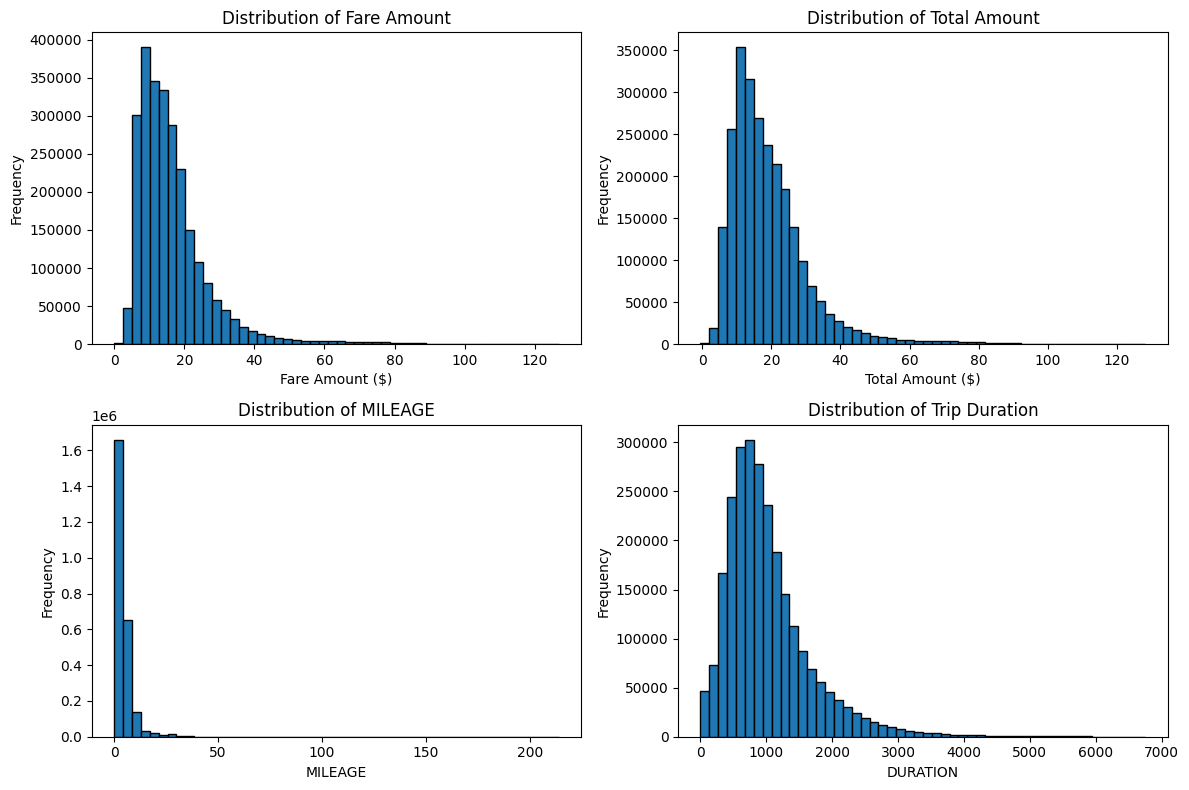

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.hist(df['FAREAMOUNT'], bins=50, edgecolor='k')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(df['TOTALAMOUNT'], bins=50, edgecolor='k')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(df['MILEAGE'], bins=50, edgecolor='k')
plt.title('Distribution of MILEAGE')
plt.xlabel('MILEAGE')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(df['DURATION'], bins=50, edgecolor='k')
plt.title('Distribution of Trip Duration')
plt.xlabel('DURATION')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As central limit theorem states, all these features follow normal distribution, and all of them are right skewed.

○ What are the frequencies of values?



In [ ]:
print(df['TRIPTYPE'].value_counts())

TRIPTYPE
Ordinal                2265208
Unknown                 168253
Transport DC             91519
Other grant program      12612
Name: count, dtype: int64


In [ ]:
print(df['PAYMENTTYPE'].value_counts())

PAYMENTTYPE
1    1179195
2     942203
4     270402
6      73393
3      72399
Name: count, dtype: int64


In [ ]:
print(df['AIRPORT'].value_counts())

AIRPORT
0    1996283
1     541309
Name: count, dtype: int64


---

Explore relationships between variables

○ Which ones appear independent? Which ones appear dependent and on what?

○ Explore possible:

    ■ Event frequencies
    ■ Periodicity/seasonality
    ■ Correlations between variables
    ■ Pairwise relationships
    ■ Anything else that could be interesting/useful in understanding your data

○ Be sure to visualize!

○ Be sure you explain in detail what you are finding/seeing (or not) in the data.

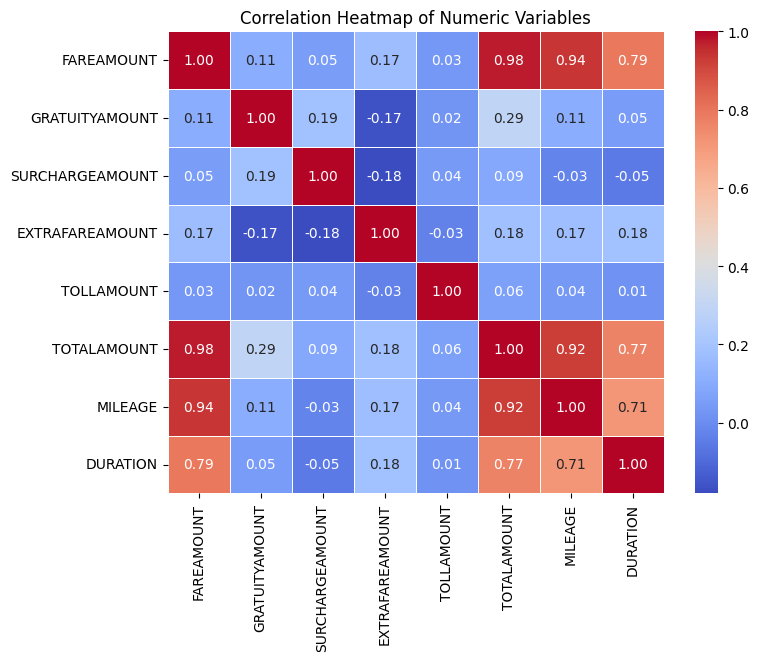

In [ ]:
columns = ['FAREAMOUNT', 'GRATUITYAMOUNT', 'SURCHARGEAMOUNT',
            'EXTRAFAREAMOUNT', 'TOLLAMOUNT', 'TOTALAMOUNT',
            'MILEAGE', 'DURATION']

correlation_matrix = df[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

This correlation map tells us the correlation between features. It ranges from -1 to +1 and value nearer to zero means that the features are independent.

According to the map, features such as fare amount, total amount, mileage and duration are dependent on eachother.

Whereas, features such as gratuity amount, extra fare amount, surcharge amount and toll amount are not dependent on any other features.

The highest correlation value seen in the figure is 0.98, that is, fareamount and total amount, which is totally understandable that total amount is highly depoendent on fare amount.

Also, the fare amount is dependent on mileage and duration of trip.

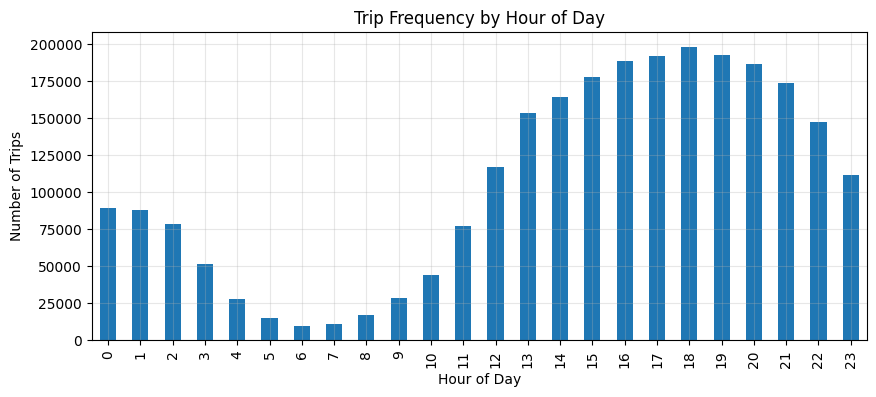

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])

df['hour'] = df['ORIGINDATETIME_TR'].dt.hour

plt.figure(figsize=(10,4))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(alpha=0.3)
plt.show()


The nice plot above represents frequency of taxi rides during an hour of the day.

It shouws that, there is peak demand for taxis from 12pm to 11pm (23:00).

Lowest demand is in between 4am to 9 am.

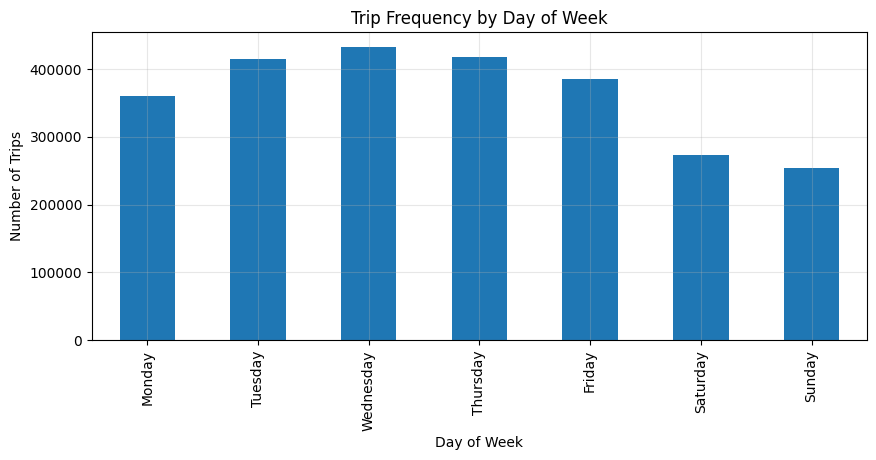

In [ ]:
df['day_of_week'] = df['ORIGINDATETIME_TR'].dt.day_name()

sequence = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,4))
df['day_of_week'].value_counts().reindex(sequence).plot(kind='bar')
plt.title('Trip Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(alpha=0.3)
plt.show()

The b=plot above represents trip frequency by day of week.

It seems like there is substancial low demand on weekends in comparison with weekdays.

We can infer that, many people in Washington D.C., prefer not to go out on weekends.

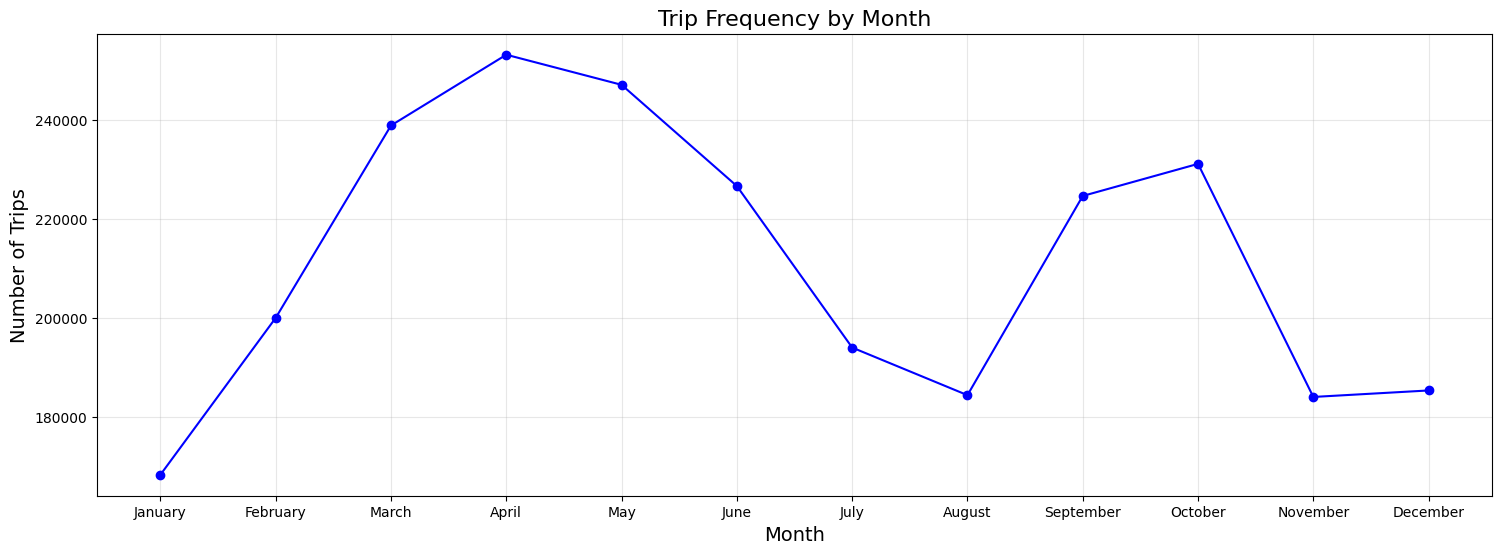

In [ ]:
df['month'] = df['ORIGINDATETIME_TR'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count trips per month in order
month_counts = df['month'].value_counts().reindex(month_order)

plt.figure(figsize=(18,6))
plt.plot(month_order, month_counts, marker='o', linestyle='-', color='b')  # line with points
plt.title('Trip Frequency by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


Trip count steadily increase from Jnauary to April, peak in April, suggesting higher travel history in spring.

September and October show regular rise in useage, suggesting people getting back to work.

We can see big drops in number of trips in summer break months and winter holidays.

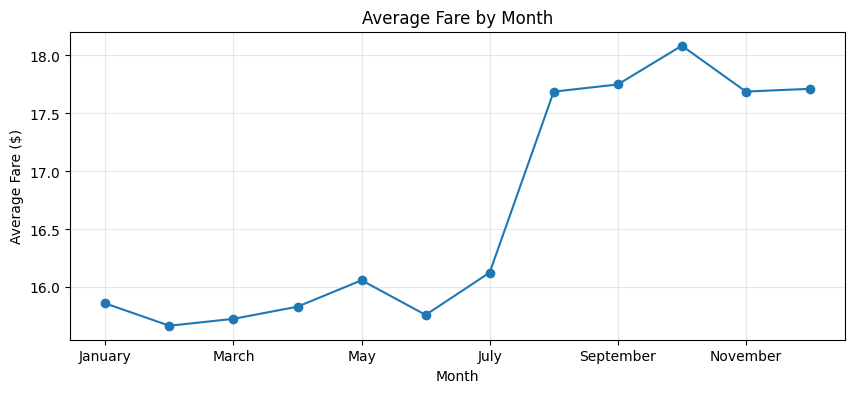

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])
df['month'] = df['ORIGINDATETIME_TR'].dt.month_name()

month_avg_fare = df.groupby('month')['FAREAMOUNT'].mean().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,4))
month_avg_fare.plot(kind='line', marker='o')
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare ($)')
plt.grid(alpha=0.3)
plt.show()


Interestingly, average fare in fall months is higher and lower in spring months.

This can be a reason behind more number of rides during spring months.

Important thing to note that the difference in this average is not very large.

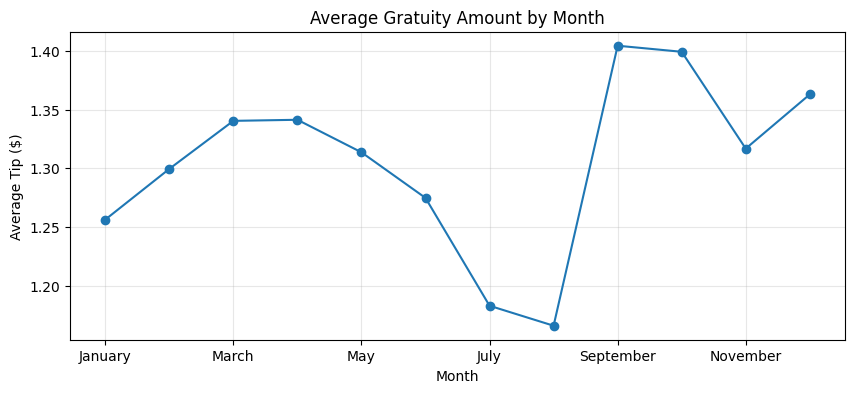

In [ ]:
month_avg_tip = df.groupby('month')['GRATUITYAMOUNT'].mean().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,4))
month_avg_tip.plot(kind='line', marker='o')
plt.title('Average Gratuity Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Tip ($)')
plt.grid(alpha=0.3)
plt.show()


The average tip given in fall months is higher even though it has less number of rides. Also, we can see that, people tend to tip more in December (Christmas Holidays).

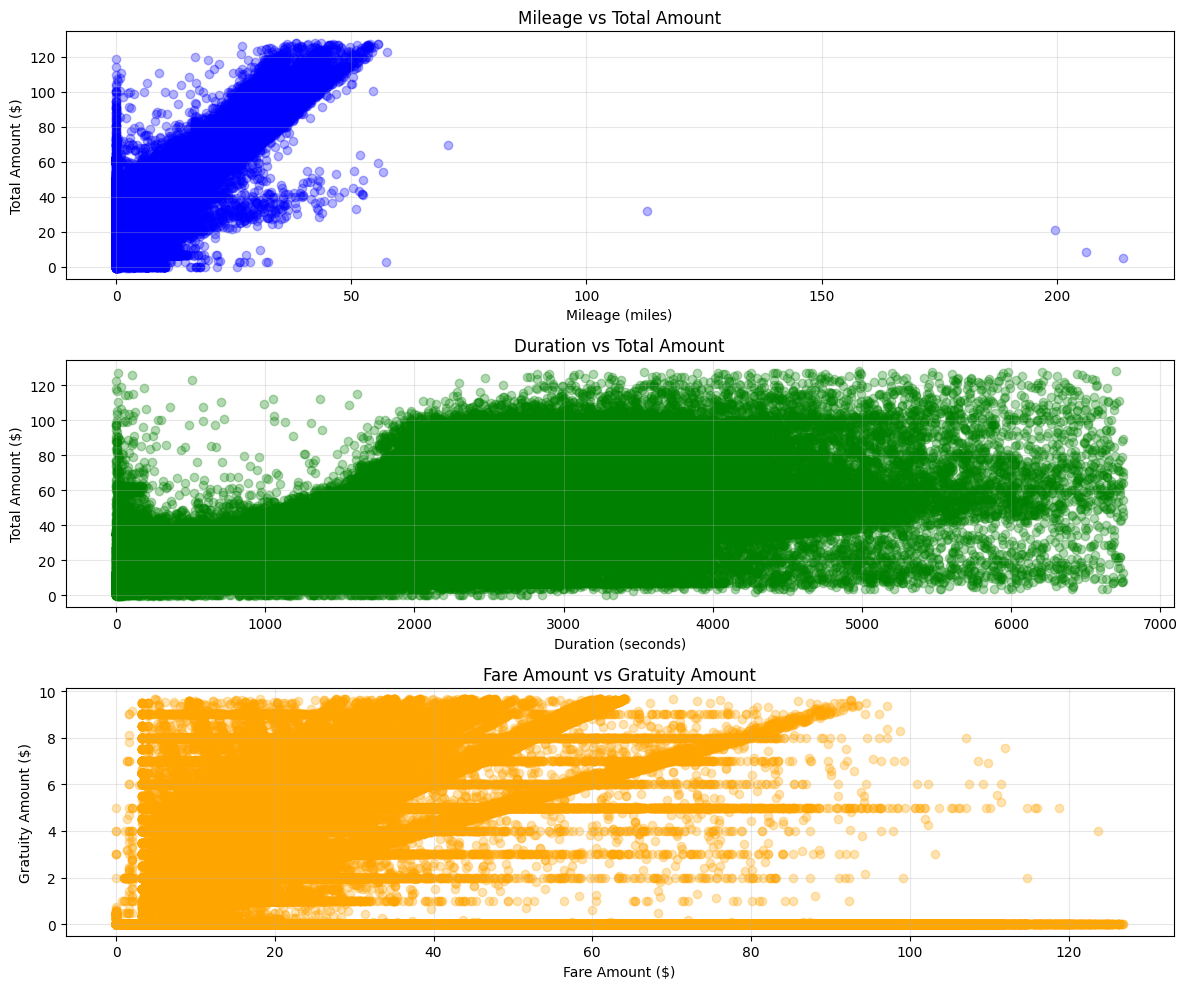

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.scatter(df['MILEAGE'], df['TOTALAMOUNT'], alpha=0.3, color='blue')
plt.title('Mileage vs Total Amount')
plt.xlabel('Mileage (miles)')
plt.ylabel('Total Amount ($)')
plt.grid(alpha=0.3)

plt.subplot(3, 1, 2)
plt.scatter(df['DURATION'], df['TOTALAMOUNT'], alpha=0.3, color='green')
plt.title('Duration vs Total Amount')
plt.xlabel('Duration (seconds)')
plt.ylabel('Total Amount ($)')
plt.grid(alpha=0.3)

plt.subplot(3, 1, 3)
plt.scatter(df['FAREAMOUNT'], df['GRATUITYAMOUNT'], alpha=0.3, color='orange')
plt.title('Fare Amount vs Gratuity Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Gratuity Amount ($)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


As we can se,

Plot 1: Mileage vs Total Amount

--> It is a strong positive relationship. Total fare increases with increase in mileage

Plot 2: Duration vs Total Amount

--> It is a positive relationship. As trip duration increases, total fare also increases.

Plot 3: Fare Amount vs Gratuity Amount

--> This is a weak positive trend. It states that, with increase in fare amount, tip behavior changes. People tend to tip more in trips with high fares.

---

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


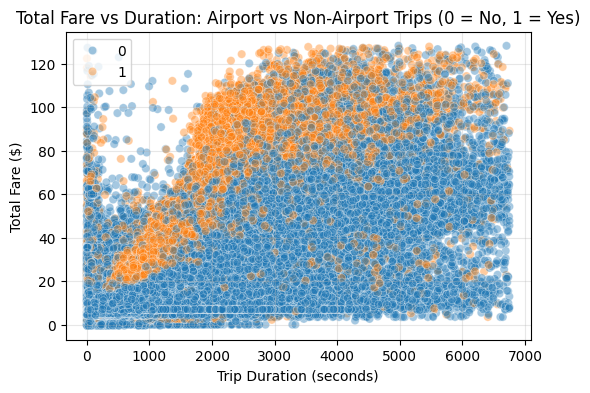

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='DURATION', y='TOTALAMOUNT', hue='AIRPORT', alpha=0.4)
plt.title('Total Fare vs Duration: Airport vs Non-Airport Trips (0 = No, 1 = Yes)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Total Fare ($)')
plt.legend(title='')
plt.grid(alpha=0.3)
plt.show()


As we can see,

For LOWER trip DURATIONS: Total Fares for airport trips are high (the higher orange datapoints in range of 500-4000 duration)

For Higher trip DURATIONS: Total Fare for both airport trips and non- airport trips is high.

This kind of proves our hypthesis that taxi fares are higher for airport trips.

○ Optional: Extra Credit (up to 15 points): Simpson’s Paradox
    
    ■ [Up to 5 points each] If your dataset has variables with subgroups (ex.
    married vs. single, age groups, gender, illness severity groups, etc), do
    the same plots for each individual subgroup and compare them to the
    plot with the entire variable sample.

● Are there any interesting patterns or possible evidence of
Simpson’s Paradox? Explain.

**Simpson's Paradox:**

It states data can show different trends when looked through subgroups and whole in total.



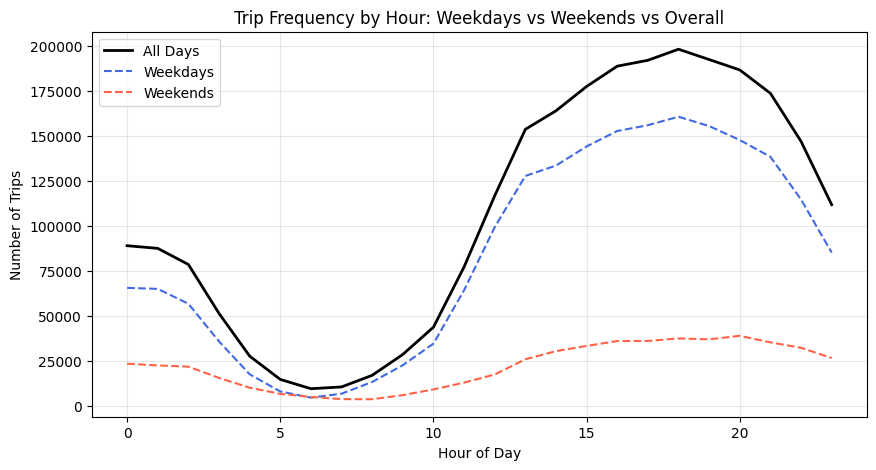

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])
df['hour'] = df['ORIGINDATETIME_TR'].dt.hour
df['day_of_week'] = df['ORIGINDATETIME_TR'].dt.dayofweek

weekday_trips = df[df['day_of_week'] < 5]
weekend_trips = df[df['day_of_week'] >= 5]

overall_trip_count = df['hour'].value_counts().sort_index()
weekday_trip_count = weekday_trips['hour'].value_counts().sort_index()
weekend_trip_count = weekend_trips['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(overall_trip_count.index, overall_trip_count.values, label='All Days', color='black', linewidth=2)
plt.plot(weekday_trip_count.index, weekday_trip_count.values, label='Weekdays', color='royalblue', linestyle='--')
plt.plot(weekend_trip_count.index, weekend_trip_count.values, label='Weekends', color='tomato', linestyle='--')

plt.title('Trip Frequency by Hour: Weekdays vs Weekends vs Overall')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#taken help of gen AI to make this plot

The above graph, Trip frequency by hour over weekdays and weekends, analyzes subgroups of weekdays and weekends.

As we can see, there is a peak use of taxi in hours between 10:00 to 23:00 for all days (all data together) and weekdays. But, in case of weekends, the pattern dilutes and shows minimal increase in taxi useage.

This shows tat it is an exmaple of simpson's paradox.


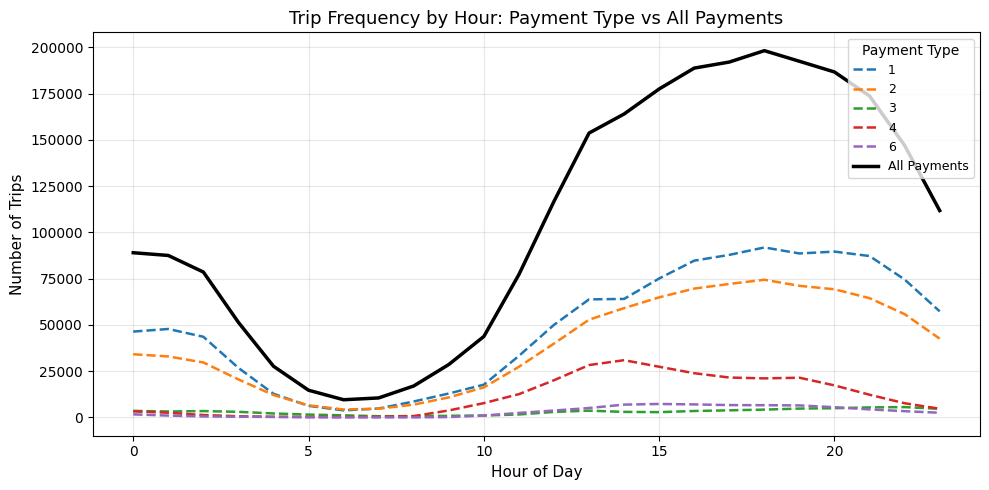

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])
df['hour'] = df['ORIGINDATETIME_TR'].dt.hour

payment_hourly = df.groupby(['hour', 'PAYMENTTYPE']).size().unstack(fill_value=0)

payment_hourly['All Payments'] = payment_hourly.sum(axis=1)

plt.figure(figsize=(10,5))

colors = plt.cm.tab10.colors

for i, col in enumerate(payment_hourly.columns):
    if col == 'All Payments':
        plt.plot(payment_hourly.index, payment_hourly[col],
                 label=col, color='black', linewidth=2.5)
    else:
        plt.plot(payment_hourly.index, payment_hourly[col],
                 label=col, color=colors[i % len(colors)],
                 linestyle='--', linewidth=1.8)

plt.title('Trip Frequency by Hour: Payment Type vs All Payments', fontsize=13)
plt.xlabel('Hour of Day', fontsize=11)
plt.ylabel('Number of Trips', fontsize=11)
plt.legend(title='Payment Type', fontsize=9, title_fontsize=10, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#taken help of GenAI for making this plot

The lines of individual payments type such as 1, 2, 3, 4 and 6 represent different trends. Whereas, combination of all payment types spread ovr hours in a day show a different trend with strong drop between 3 to 10 as well as strong peak between 11 to 23.

This is also an example of Simpson's Paradox.

---

Do you trust that this data is a reasonable dataset to use?

○ Why or why not?

○ If not, how will you handle it?

I trust this data.

* It is published by government
    
    PROVIDER: Office of the Chief Technology Officer (OCTO)

    ORIGINATOR: Department of For-Hire Vehicles (DFHV)

* Features align very well with real world scenarios (as it is real world data collected by government)

* After data cleaning (filling null values, removing outliers, datatype transformation and other manipulations), we have a quality data which shows logical relationships between variables.

---

Wrap up

○ Provide an overview of what you learned through the Data Exploration process.

    ■ Did this affect your hypothesis?
    ■ Why or why not?

○ Summarize any key findings, insights, or things you’ll want to explore more.

Through the data exploration process, I gained an understanding of how features such as Fare, gratuity, duration, etc. affect the Total fare of the trip.

Analysis confirmed our hypothesis that airport trips have higher fares than normal ones. It is supported by visualization. Laer, we will do this using descriptive statitucs using test scores.

We checked for relationships between features using co-relation map as well as pair plots. Mileage, duration have positive relationship with Total fare.

We captured seasonalities in trip useage over months, and hours of a day

We saw that our features follow normal distribution and it is skewed on right.

We also saw two examples of Simpson's paradox in our dataset.

More exploration- hypothesis testing using test statistics.

---
